In [1]:
from delta_surface import *
from concurrent.futures import ThreadPoolExecutor

In [2]:
test = delta_suface(['TSLA', 'AAPL', 'MSFT'])

In [3]:
#test = delta_suface(['AAPL', 'TSLA'])

In [4]:
test.get_px()

[*********************100%***********************]  3 of 3 completed


In [5]:
test.poly_chain()

In [6]:
test.poly_parse()

In [7]:
test.iv_calcs()

In [8]:
test.hist_poly_thread(thread_count=50)

,v,vw,o,c,h,l,t,n,ticker,date
0,1.0,177.2500,177.25,177.25,177.25,177.25,1.684901e+12,1.0,O:TSLA231215C00005000,2023-05-24
1,1.0,193.0500,193.05,193.05,193.05,193.05,1.685074e+12,1.0,O:TSLA231215C00005000,2023-05-26
2,1.0,193.5000,193.50,193.50,193.50,193.50,1.685419e+12,1.0,O:TSLA231215C00005000,2023-05-30
3,1.0,160.0500,160.05,160.05,160.05,160.05,1.684296e+12,1.0,O:TSLA231215C00010000,2023-05-17
4,1.0,183.7200,183.72,183.72,183.72,183.72,1.685074e+12,1.0,O:TSLA231215C00010000,2023-05-26
...,...,...,...,...,...,...,...,...,...,...
2187,1.0,0.6000,0.60,0.60,0.60,0.60,1.686024e+12,1.0,O:MSFT231215C00490000,2023-06-06
2188,1.0,0.4500,0.45,0.45,0.45,0.45,1.686283e+12,1.0,O:MSFT231215C00490000,2023-06-09
2189,10.0,0.3900,0.39,0.39,0.39,0.39,1.686110e+12,1.0,O:MSFT231215C00500000,2023-06-07
2190,1.0,0.4000,0.40,0.40,0.40,0.40,1.686283e+12,1.0,O:MSFT231215C00500000,2023-06-09


In [9]:
test.delta_curve(sf = 0.05)

In [10]:
test.curve_df

,TSLA,AAPL,MSFT
0.50,0.950805,0.966928,1.000000
0.51,0.946268,0.966928,1.000000
0.52,0.941581,0.966928,0.994072
0.53,0.936745,0.966928,0.987342
0.54,0.931765,0.966928,0.981025
...,...,...,...
1.46,0.236406,0.000000,0.012301
1.47,0.230444,0.000000,0.012301
1.48,0.224606,0.000000,0.012301
1.49,0.218895,0.000000,0.012301


When we reach max or min for first time outwith 50d, maybe we stick to 0/1 from there

In [12]:
vol_df = test.delta_df[test.delta_df['ticker'] == 'MSFT'].sort_values('strike')

In [13]:
x = test.curve_df.index
y = test.curve_df['MSFT']

x_init = vol_df['k_norm']
y_init = vol_df['pv_delta']

x_new = np.arange(0.5,1.51,0.01)

In [14]:
from scipy import interpolate

In [15]:
spl = interpolate.UnivariateSpline(x, y)
spl.set_smoothing_factor(0.2)

In [16]:
y_new = pd.DataFrame(spl(x_new)).cummin()[::-1].cummax()[::-1]

In [17]:
import matplotlib.pyplot as plt

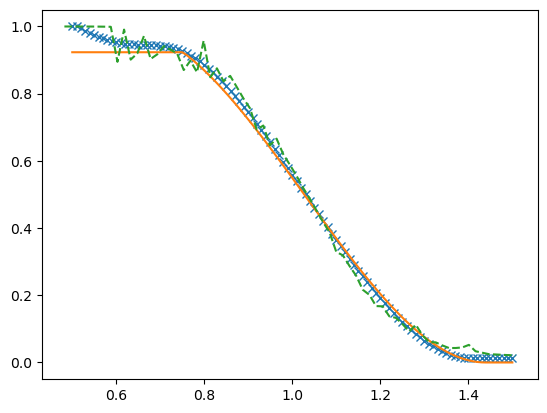

In [18]:
plt.plot(x, y, 'x', x_new, y_new, '-', x_init, y_init, '--')